In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import necessary libraries
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

#Read the data        
dirname = '/kaggle/input/cats-and-dogs-classification/data/train'

Train_data = []
Labels = []
count = 0;
Classes = ["cats", "dogs"]

for files in os.listdir(dirname):
    image_name = os.path.join(dirname,files)
    print(image_name)
    count = count + 1
    for images in os.listdir(image_name):
        train_img = cv2.resize(cv2.imread(os.path.join(image_name,images)),(256,256)) 
        Train_data.append(train_img)
        Labels.append(count-1)

#Read the data        
dirname = '/kaggle/input/cats-and-dogs-classification/data/test'

count = 0

for files in os.listdir(dirname):
    image_name = os.path.join(dirname,files)
    print(image_name)
    count = count + 1
    for images in os.listdir(image_name):
        train_img = cv2.resize(cv2.imread(os.path.join(image_name,images)),(256,256)) 
        Train_data.append(train_img)
        Labels.append(count-1)


/kaggle/input/cats-and-dogs-classification/data/train/cats
/kaggle/input/cats-and-dogs-classification/data/train/dogs
/kaggle/input/cats-and-dogs-classification/data/test/cats
/kaggle/input/cats-and-dogs-classification/data/test/dogs


In [2]:
#import tensorflow and keras libraries
#Defining our model
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(5,5),activation='relu',input_shape=(256,256,3)))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides= (2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(5,5),activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides= (2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(2, activation='softmax'))


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [3]:
#Since training dataset has only 40 images, increasing sample size using data augmentation.

from keras.preprocessing.image import ImageDataGenerator
from numpy import expand_dims
from sklearn.model_selection import train_test_split

# Initialising the ImageDataGenerator class. 
# We will pass in the augmentation parameters in the constructor. 

#one type of data generator
datagen_1 = ImageDataGenerator( 
        rotation_range = 40, 
        shear_range = 0.55, 
        zoom_range = 0.22, 
        horizontal_flip = True, 
        vertical_flip=True)

for train_index in range(0,len(Train_data)):
    reshaped_train_image = expand_dims(Train_data[train_index],0)
    iterator_1 = datagen_1.flow(reshaped_train_image,batch_size = 1)
    for i in range(20):
        image_next =iterator_1.next()
        Train_data.append(image_next[0].astype('uint8'))
        Labels.append(Labels[train_index])

#second type of data generator
datagen_2 = ImageDataGenerator( 
        rotation_range = 90, 
        shear_range = 0.85, 
        zoom_range = 0.12, 
        horizontal_flip = True, 
        vertical_flip=True)

for train_index in range(0,len(Train_data)):
    reshaped_train_image = expand_dims(Train_data[train_index],0)
    iterator_2 = datagen_2.flow(reshaped_train_image,batch_size = 1)
    for i in range(10):
        image_next =iterator_2.next()
        Train_data.append(image_next[0].astype('uint8'))
        Labels.append(Labels[train_index])

print(len(Train_data))

#Splitting into train and test data
TrainX, TestX, TrainY, TestY = train_test_split(Train_data, Labels, test_size=0.2)

13860


13860
13860
Number of image in Training Data:  13860


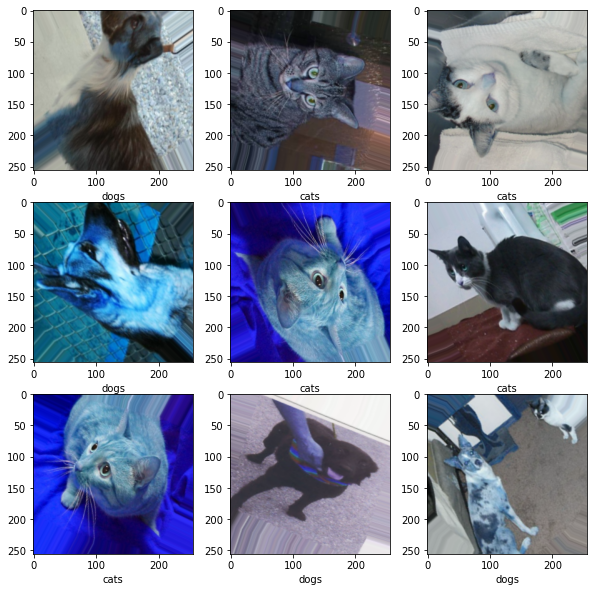

In [4]:
print(len(Train_data))
print(len(Labels))

Train_data = np.array(Train_data)
Labels = np.array(Labels)
print("Number of image in Training Data: ", len(Train_data))

#plotting few images
fig = plt.figure(figsize=(10,10))

for i in range(0,9):
    RandomNumber = random.randint(0,len(Train_data)-1)
    plt.subplot(3,3,i+1)
    plt.imshow(Train_data[RandomNumber])
    plt.xlabel(Classes[Labels[RandomNumber]])

In [5]:
# training the model
TrainX = np.array(TrainX)
TrainY = np.array(TrainY)
TestX = np.array(TestX)
TestY = np.array(TestY)
print(len(TrainX))

model.fit(TrainX, TrainY,batch_size=100, epochs = 100)

11088
Epoch 1/100
111/111 [==============================] - 10s 89ms/step - loss: 0.8157 - accuracy: 0.4975
Epoch 2/100
111/111 [==============================] - 9s 83ms/step - loss: 0.8204 - accuracy: 0.4929
Epoch 3/100
111/111 [==============================] - 9s 81ms/step - loss: 0.8115 - accuracy: 0.5018
Epoch 4/100
111/111 [==============================] - 9s 81ms/step - loss: 0.8119 - accuracy: 0.5014
Epoch 5/100
111/111 [==============================] - 9s 82ms/step - loss: 0.8159 - accuracy: 0.4974
Epoch 6/100
111/111 [==============================] - 9s 82ms/step - loss: 0.8156 - accuracy: 0.4977
Epoch 7/100
111/111 [==============================] - 9s 82ms/step - loss: 0.8161 - accuracy: 0.4972
Epoch 8/100
111/111 [==============================] - 9s 84ms/step - loss: 0.8161 - accuracy: 0.4971
Epoch 9/100
111/111 [==============================] - 9s 82ms/step - loss: 0.8153 - accuracy: 0.4979
Epoch 10/100
111/111 [==============================] - 9s 81ms/step - loss

In [6]:
#Evaluating the model
model.evaluate(TestX,TestY, verbose=1)

87/87 [==============================] - 1s 13ms/step - loss: 0.8053 - accuracy: 0.5079


[0.8053256869316101, 0.5079365372657776]

Predictions:  0 0
Predictions:  0 0
Predictions:  0 1
Predictions:  0 1
Predictions:  0 0
Predictions:  0 1
Predictions:  0 0
Predictions:  0 0


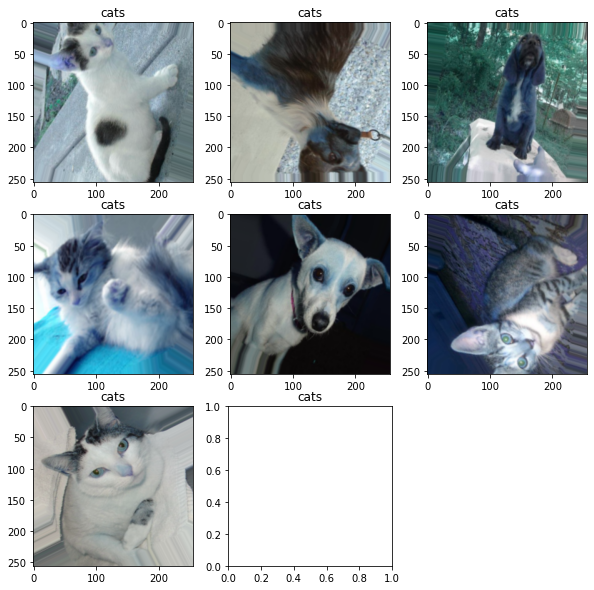

In [10]:
#pridicting test images

fig = plt.figure(figsize=(10,10))

for i in range(8):
    RandomNumber = random.randint(0,len(TestX)-1)
    plt.imshow(np.array(TestX[RandomNumber]))
    predImage = TestX[RandomNumber].reshape((1, ) + TestX[RandomNumber].shape)
    plt.subplot(3,3,i+1)
    label = model.predict_classes(predImage)
    print("Predictions: ",label.argmax() , TestY[RandomNumber])
    plt.title(Classes[label.argmax()])
